# Desafio 03 - Expectativa de vida - World Health Organization (WHO)

Link do desafio no Kaggle: https://www.kaggle.com/kumarajarshi/life-expectancy-who

Vocês devem gerar um modelo de regressão com o objetivo de responder as seguintes perguntas:


1- Quais são as variáveis que realmente afetam a expectativa de vida?

2- Um país com expectativa de vida menor (<65) deve aumentar seus investimentos em saúde a fim de melhorar sua expectativa de vida média?

3- Como as taxas de mortalidade infantil e de adultos afetam a expectativa de vida?

4- A expectativa de vida tem correlação positiva ou negativa com hábitos alimentares, estilo de vida, exercícios, fumo, consumo de álcool etc.

5- Qual é o impacto da escolaridade na expectativa de vida dos humanos?

6- A expectativa de vida tem uma relação positiva ou negativa com o consumo de álcool?

7- Países densamente povoados tendem a ter menor expectativa de vida?

8- Qual é o impacto da cobertura de imunização na expectativa de vida?

Tomadas de decisões estratégicas:

* Existe um caráter de serie temporal, multiplas entradas do mesmo país e com anos diferentes, como trataremos?
    -- utiliza a média dos valores entre todos os anos e define uma linha 
    -- Remove o rotulo dos países e trata cada entrada como um país diferente
    

*  O mundo de 2000 é completmaente diferente da realidade de 2015. Qual o recorte que o grupo vai desejar fazer?

O Agrupamento dos dados pode ser feito referente aos anos, e decidir quais anos fazem parte do grupo de interesse para avaliar o estudo. 

### Grupo de trabalho

1. João Freitas,
2. João Kruschewsky,
3. Vinícius Matos, 
4. Vito Magarão 

In [ ]:
#Importação das bibliotecas básicas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.stats import shapiro

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
from scipy.stats import shapiro
import seaborn as sns; 

sns.set(style="ticks", color_codes=True)
from scipy.stats import boxcox

In [ ]:
pd.set_option('display.float_format', str)

In [ ]:
# importando o datafram do git
df = pd.read_csv(r'https://raw.githubusercontent.com/MasterExecuson/Data-Science-Analytics/main/Life%20Expectancy%20Data%20-%20Life%20Expectancy%20Data.csv')

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df_backup = df.copy()

In [ ]:
df.shape

(2938, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.27962362,65.0,1154,...,6.0,8.16,65.0,0.1,584.25921,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.52358168,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.21924272,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.47,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.1842153,67.0,2787,...,67.0,8.52,67.0,0.1,669.959,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097108703,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
def describeColumn (df,col_index,unique=False):
    col_name = str(df.columns[col_index])
    print('Coluna ' + col_name + ":")
    print( '\nDados estatísticos: \n')
    print(df[col_name].describe())
    if(unique):
        print( '\n\nValores de Entradas Únicos: ')
        print( df[col_name].unique())
    else:
        print('\n ---------- Column Count ----------- ')
        print('\n')
        col_view_grouped = df[col_name].groupby(df[col_name]).count().sort_values(ascending = False)
        print(col_view_grouped)
        print('\n ------------ Percentage ------------- ')
        print('\n')
        col_view_grouped_percentage = df[col_name].groupby(df[col_name]).count().sort_values(ascending = False)*100/len(df[col_name])
        print(col_view_grouped_percentage)
    return

In [ ]:
for i,column in enumerate(df.columns):
    describeColumn(df,i)

Coluna Country:

Dados estatísticos: 

count            2938
unique            193
top       Afghanistan
freq               16
Name: Country, dtype: object

 ---------- Column Count ----------- 


Country
Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Palau                     1
Niue                      1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: Country, Length: 193, dtype: int64

 ------------ Percentage ------------- 


Country
Afghanistan              0.5445881552076243
Peru                     0.5445881552076243
Nicaragua                0.5445881552076243
Niger                    0.5445881552076243
Nigeria                  0.5445881552076243
                                ...        
Palau                   0.03403675970047652
Niue                    0.03403675970047652
Nauru                   0.03403675970047652

Vemos que a mortalidade infantil possui valores iguais a zero, o que demonstra um dado errôneo, que deve ser ajustado.

Percentage Expendure possui zeros (611), indicando que pode ser um valor nulo e precisa ser investigado.

Semelhantemente a coluna under-five deaths possui valores iguais a zero que são valores nulos.

Population possui valores muito pequenos (como 34) que devem ser erros de insersão.

Income composition of resources também possui dados nulos como zero.

Schooling possui valores iguais a zero (28). Estes precisam ser investigados a fundo.

In [ ]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
df[df['Population'].isna()]['Country'].value_counts()

# se o pais tiver um atributo zerado nos 16 anos, logo ele é vazio em todos os anos, já que possuimos apenas 16 anos na análise.

Antigua and Barbuda                                     16
Singapore                                               16
New Zealand                                             16
Oman                                                    16
Qatar                                                   16
Republic of Korea                                       16
Republic of Moldova                                     16
Saint Lucia                                             16
Saint Vincent and the Grenadines                        16
Saudi Arabia                                            16
Slovakia                                                16
Libya                                                   16
Somalia                                                 16
The former Yugoslav republic of Macedonia               16
United Arab Emirates                                    16
United Kingdom of Great Britain and Northern Ireland    16
United Republic of Tanzania                             

In [ ]:
def generateNumericBoxPlotAndHist(df:pd.DataFrame):
    df1 = df.select_dtypes([int, float,'category'])
    numeric_variables_graphs =  {}
    plt.figure(figsize=(80, 60), dpi=80)
    for i, column in enumerate(df1.columns):
        fig, ax = plt.subplots(1,2,figsize=(18, 6))
        sns.histplot(ax=ax[0],data=df1, x=column).set(title = "Histplot of " + column)
        sns.boxplot(x=df1[column]).set(title = "Boxplot of " + column)
        numeric_variables_graphs[column] = fig
    return numeric_variables_graphs,df1.columns

<Axes: xlabel='Year', ylabel='Count'>

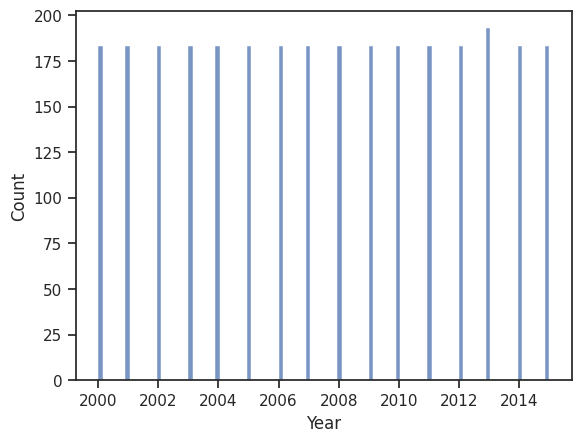

In [ ]:
sns.histplot(data=df, x='Year',bins=100)

In [ ]:
def createCategoricalGraphForTarget(df,target):
    df1 = df.select_dtypes(['category'])
    columns = df1.columns
    df1[target] = df[target].astype("category")
    category_variables_graphs_per_target =  {}
    plt.figure(figsize=(80, 60), dpi=80)
    for i, column in enumerate(columns):
        fig, ax = plt.subplots(1,1,figsize=(9, 6))
        sns.histplot(data=df1, x=column, hue=target,hue_order=[True,False],shrink=.8,multiple="dodge",bins=30,color='red',kde=True).set(title = "Histplot of " + column)
        category_variables_graphs_per_target[column] = fig
    return category_variables_graphs_per_target,columns

<ipython-input-13-158195c5052a>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1,2,figsize=(18, 6))


({'Year': <Figure size 1800x600 with 2 Axes>,
  'Life expectancy': <Figure size 1800x600 with 2 Axes>,
  'Adult Mortality': <Figure size 1800x600 with 2 Axes>,
  'infant deaths': <Figure size 1800x600 with 2 Axes>,
  'Alcohol': <Figure size 1800x600 with 2 Axes>,
  'percentage expenditure': <Figure size 1800x600 with 2 Axes>,
  'Hepatitis B': <Figure size 1800x600 with 2 Axes>,
  'Measles': <Figure size 1800x600 with 2 Axes>,
  'BMI': <Figure size 1800x600 with 2 Axes>,
  'under-five deaths': <Figure size 1800x600 with 2 Axes>,
  'Polio': <Figure size 1800x600 with 2 Axes>,
  'Total expenditure': <Figure size 1800x600 with 2 Axes>,
  'Diphtheria': <Figure size 1800x600 with 2 Axes>,
  'HIV/AIDS': <Figure size 1800x600 with 2 Axes>,
  'GDP': <Figure size 1800x600 with 2 Axes>,
  'Population': <Figure size 1800x600 with 2 Axes>,
  'thinness  1-19 years': <Figure size 1800x600 with 2 Axes>,
  'thinness 5-9 years': <Figure size 1800x600 with 2 Axes>,
  'Income composition of resources': <F

<Figure size 6400x4800 with 0 Axes>

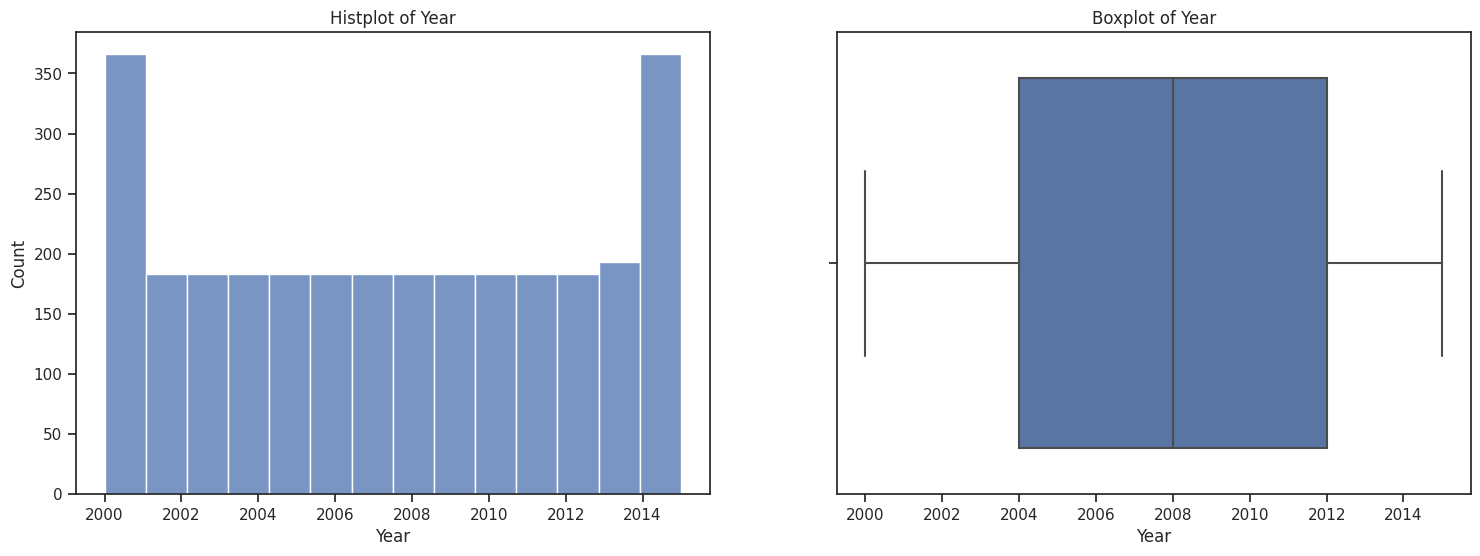

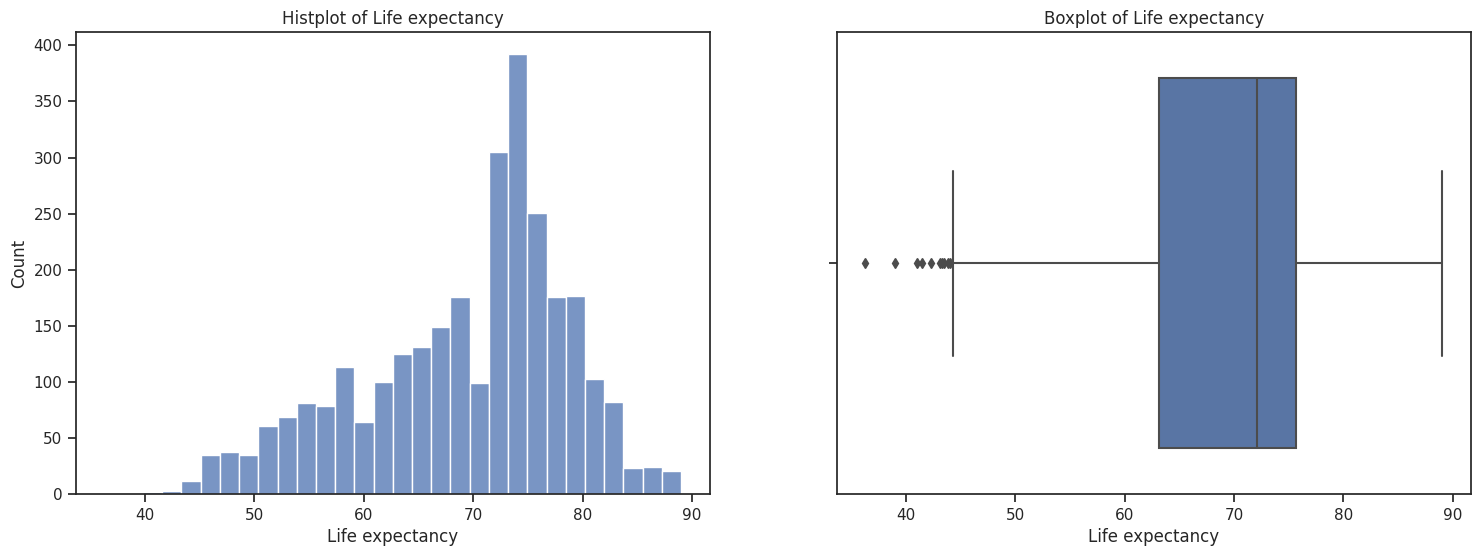

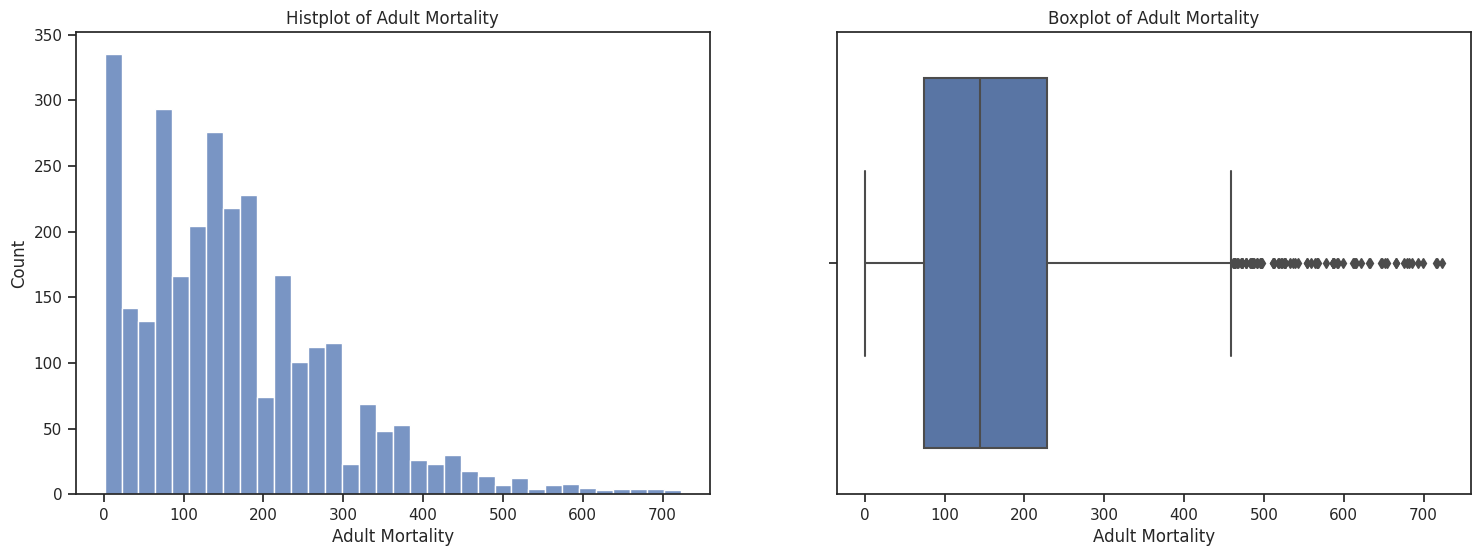

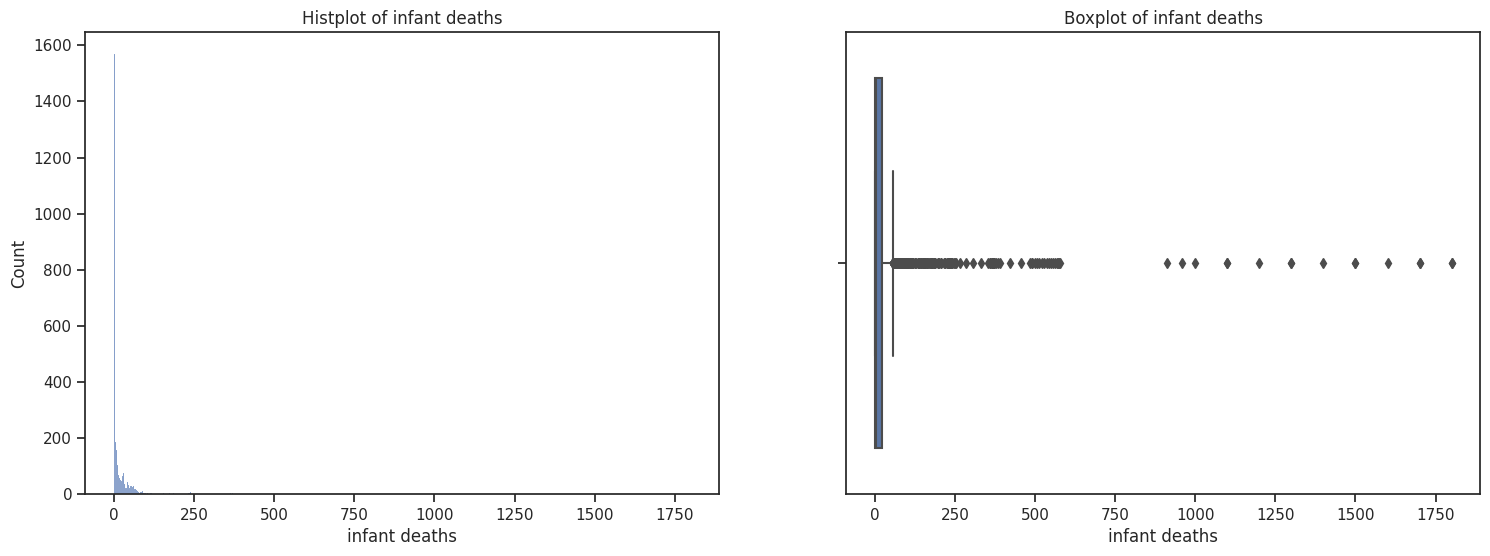

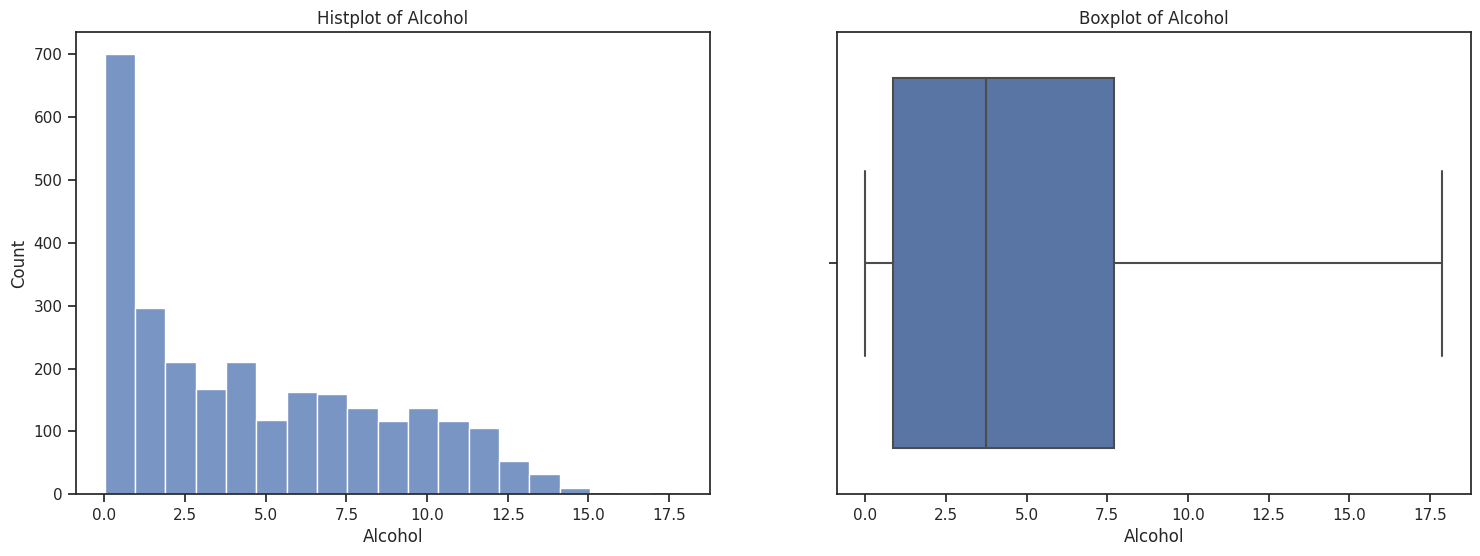

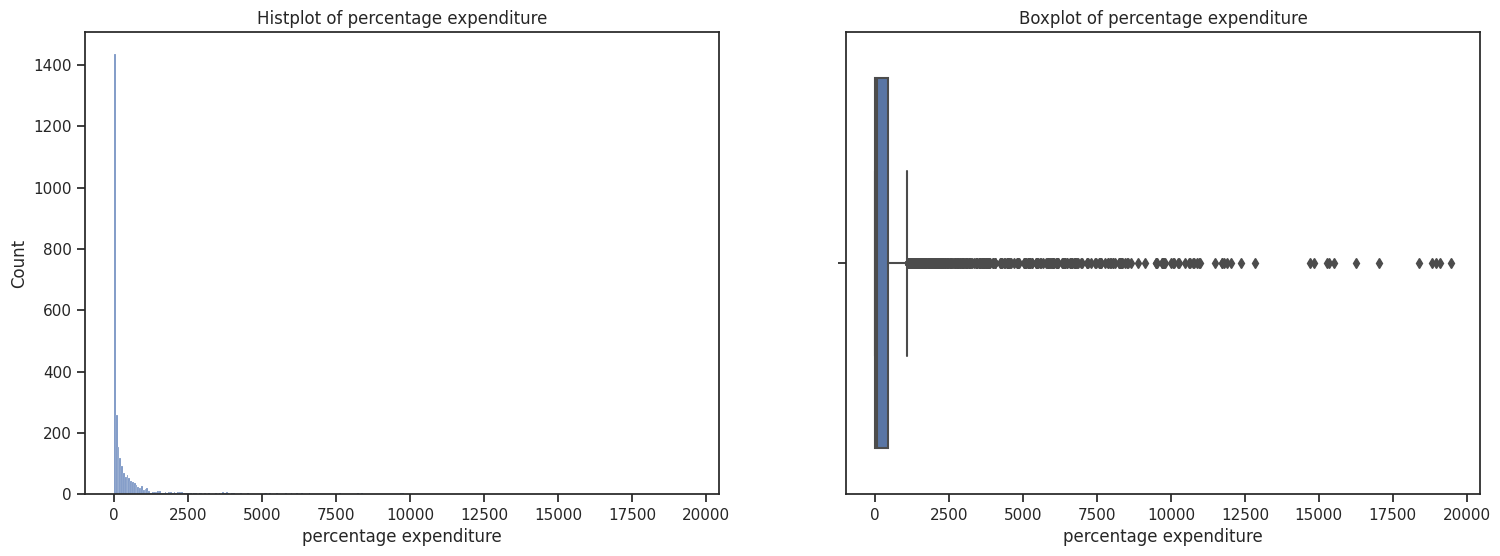

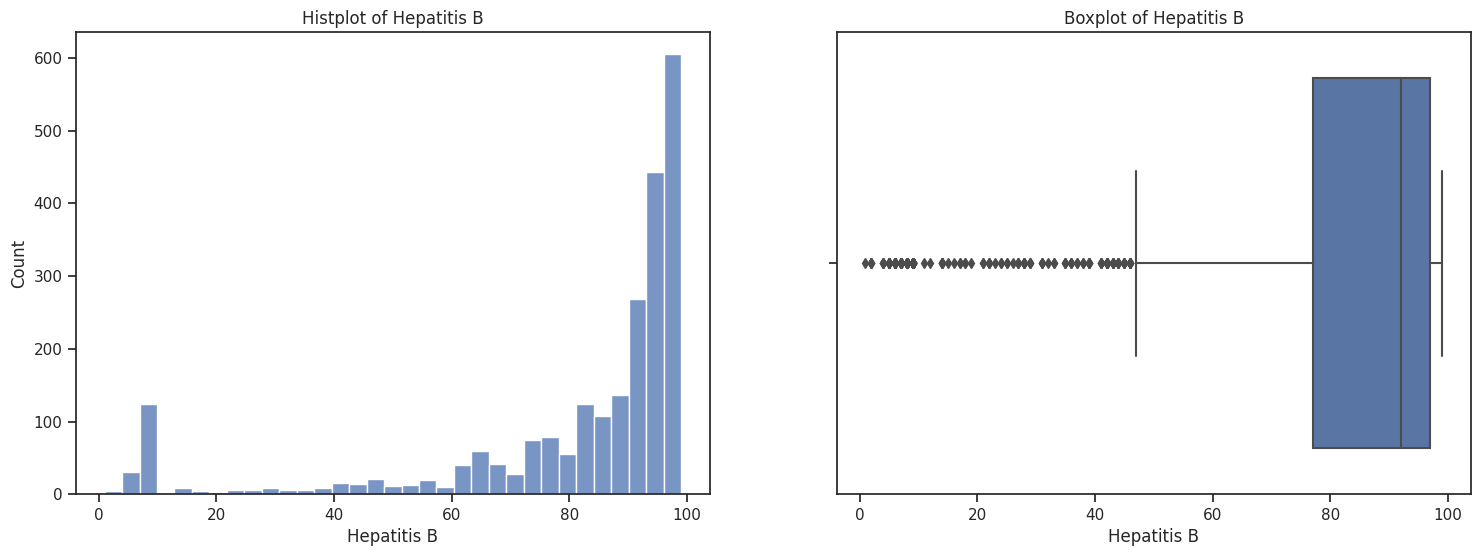

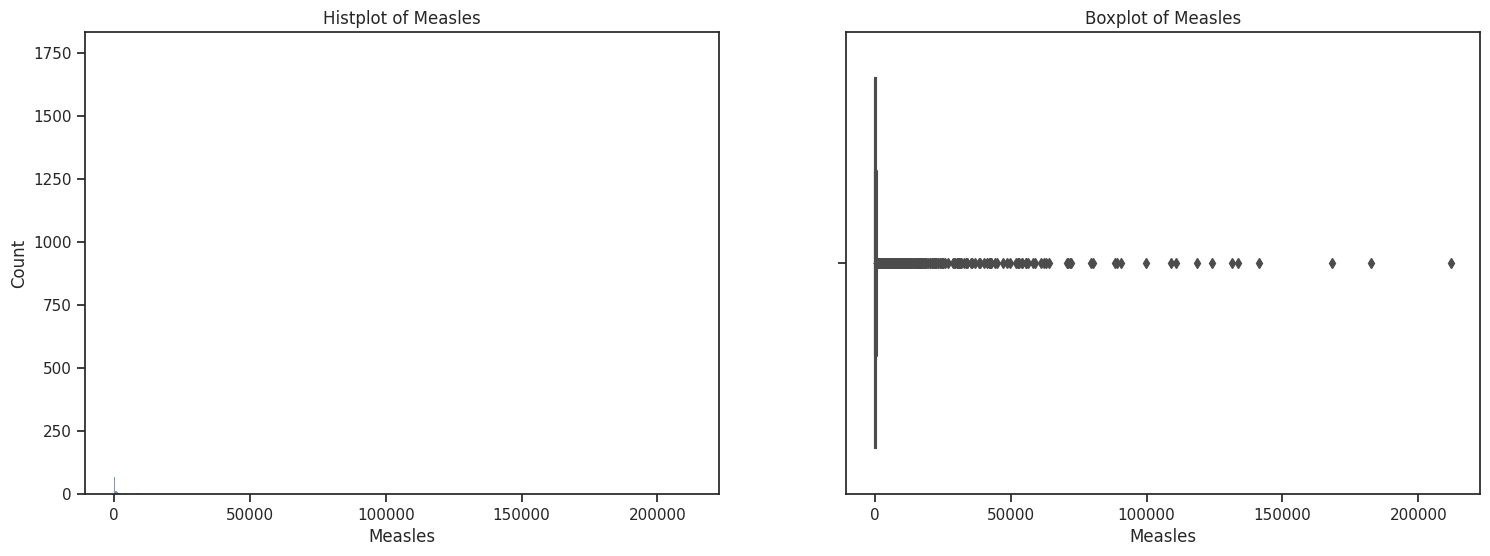

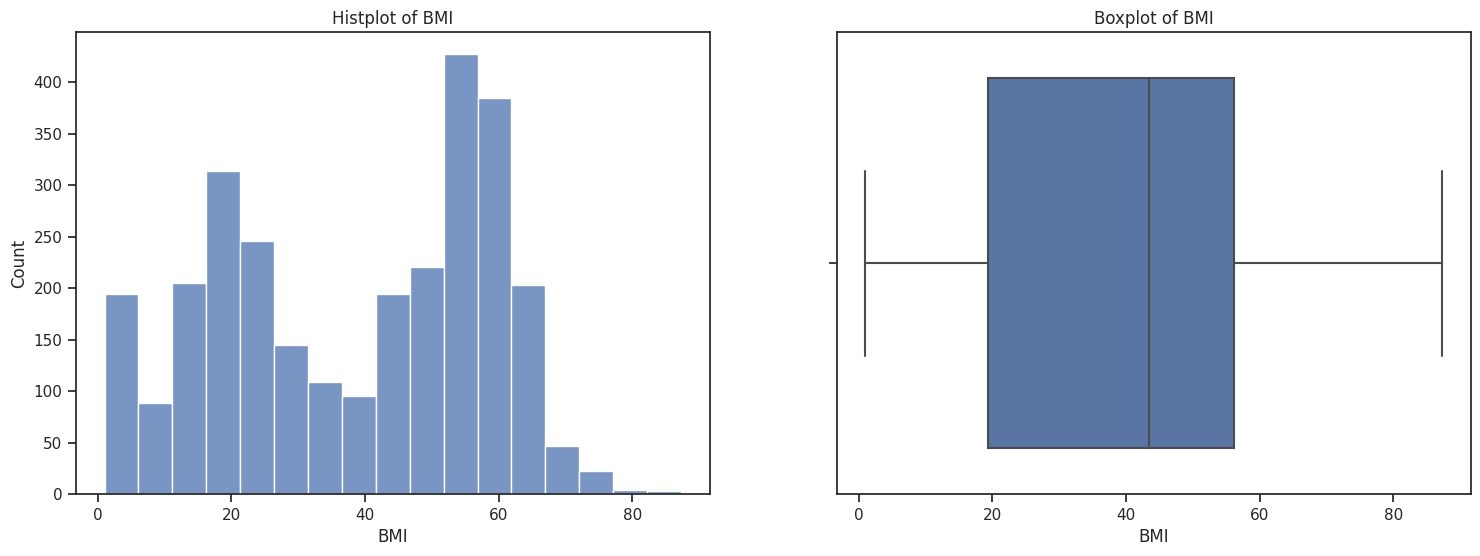

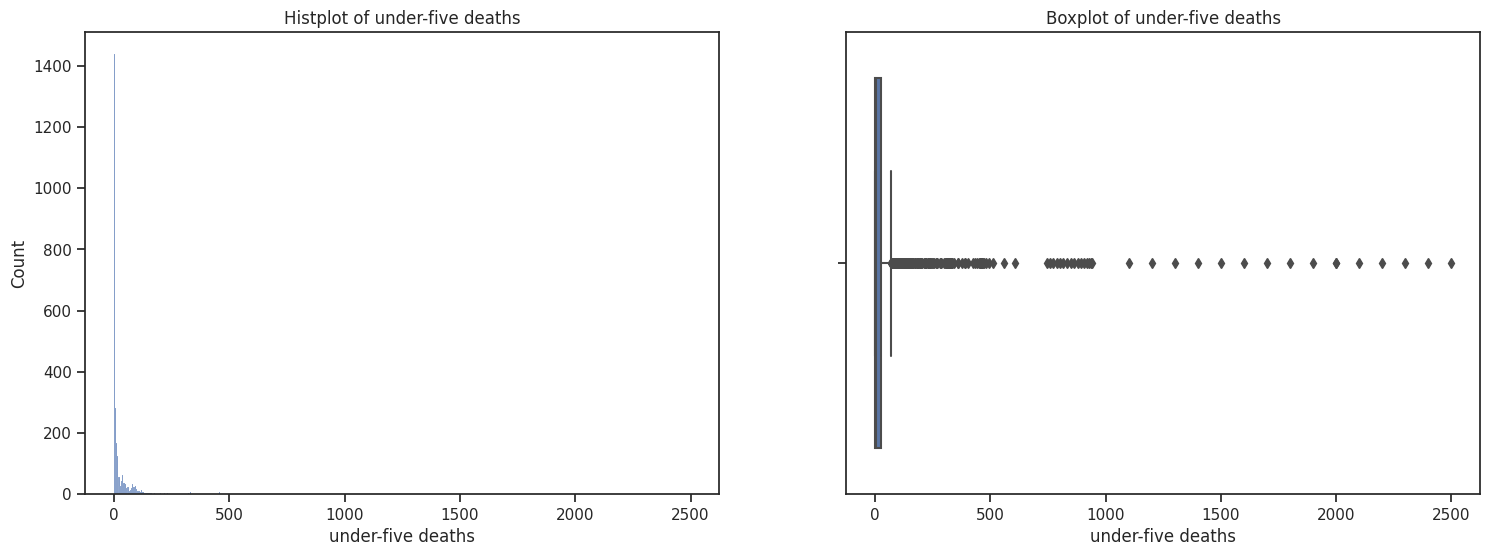

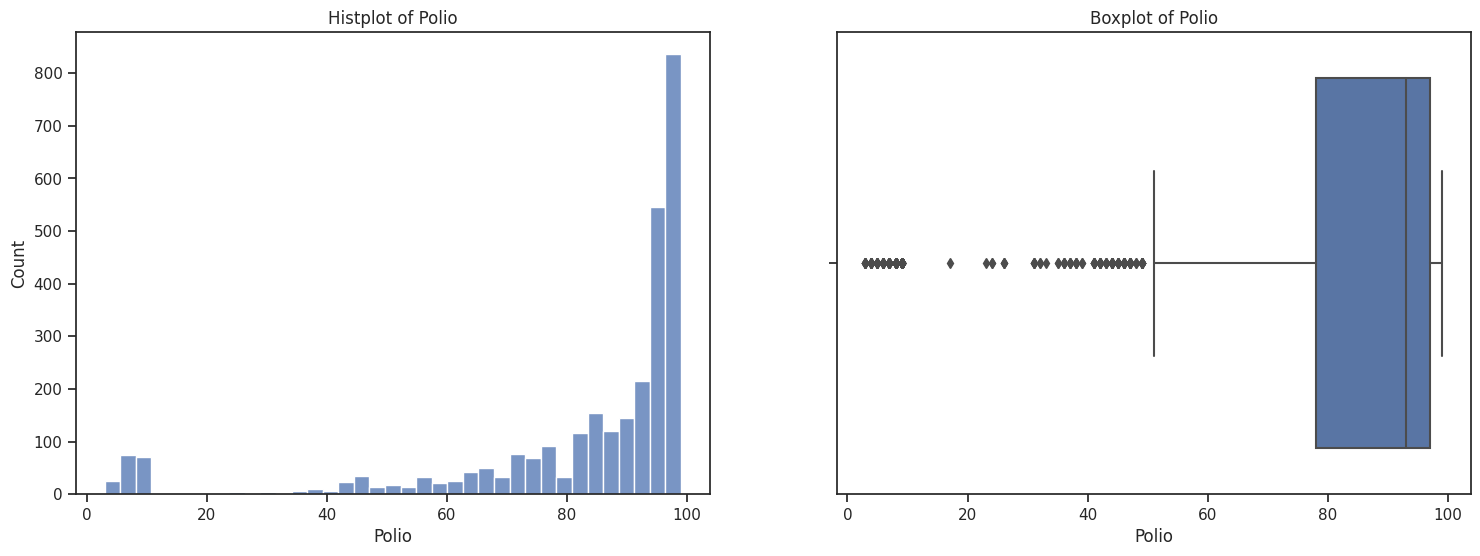

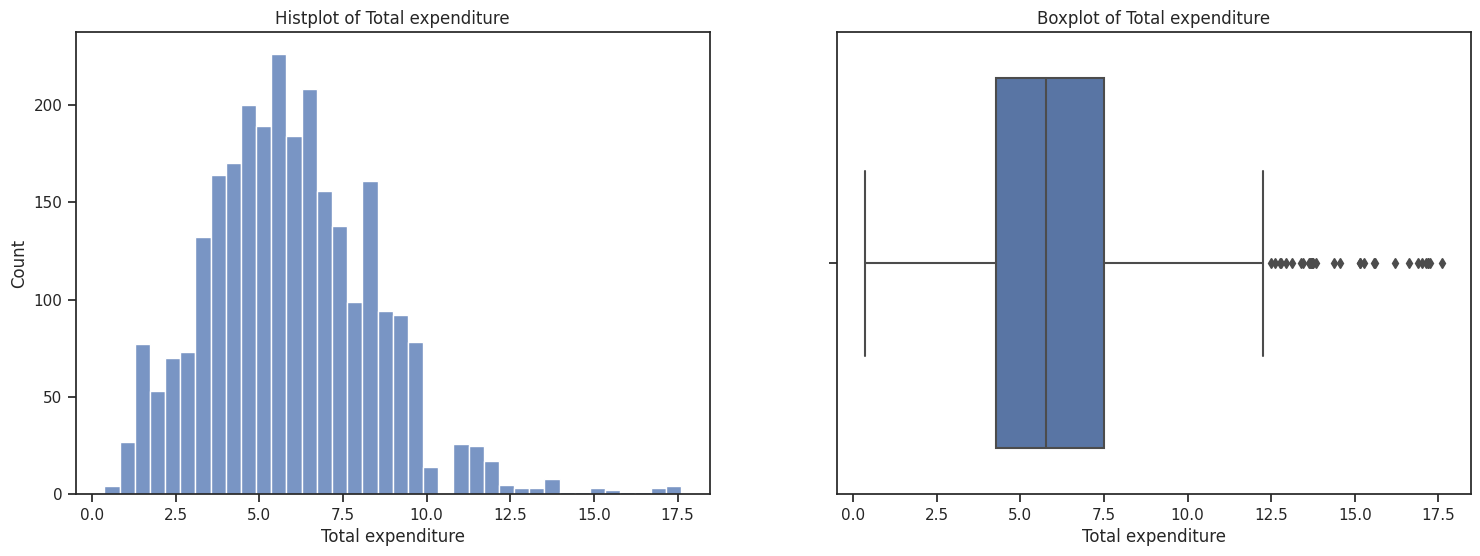

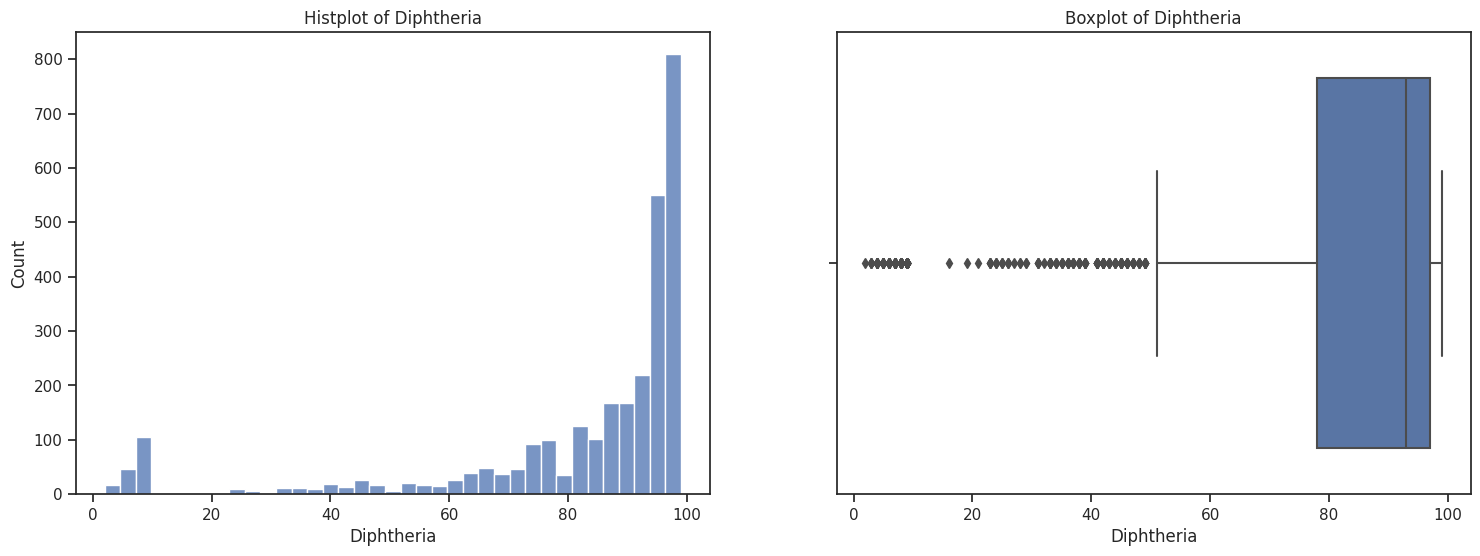

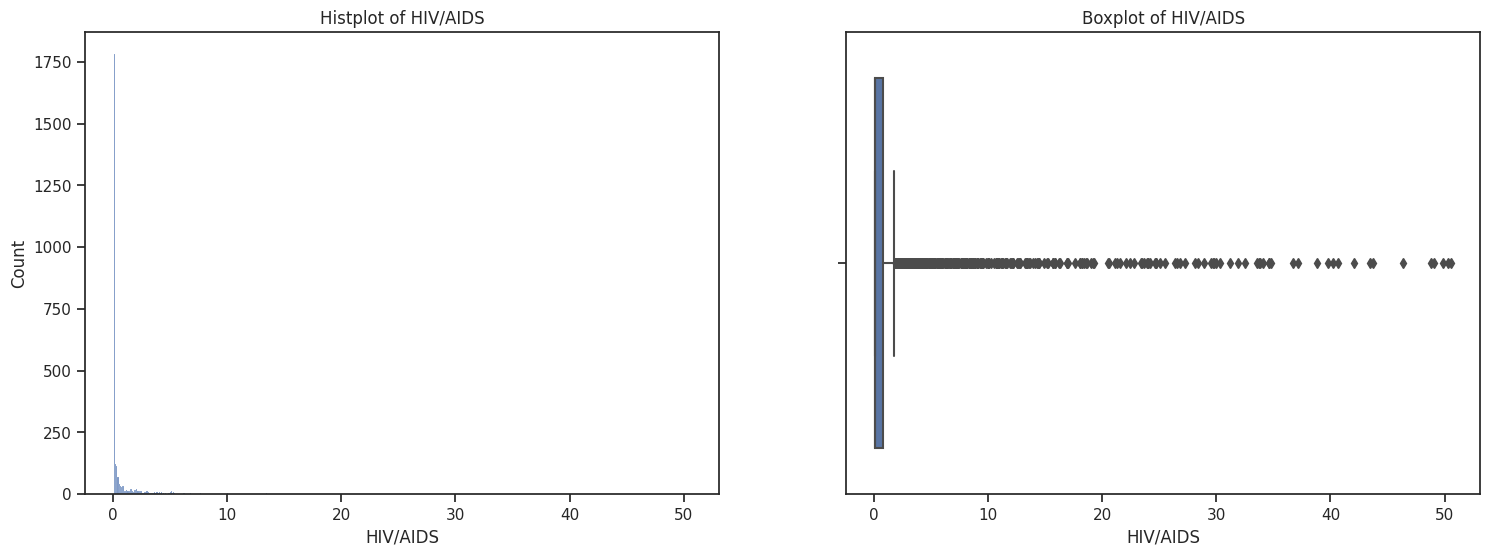

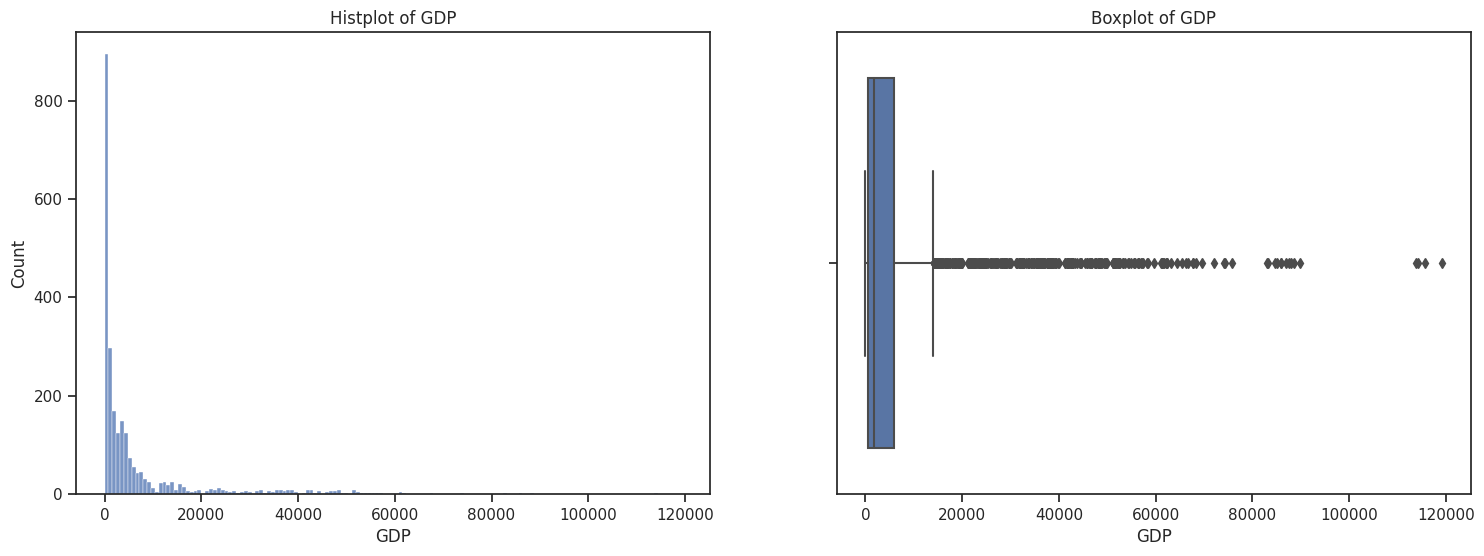

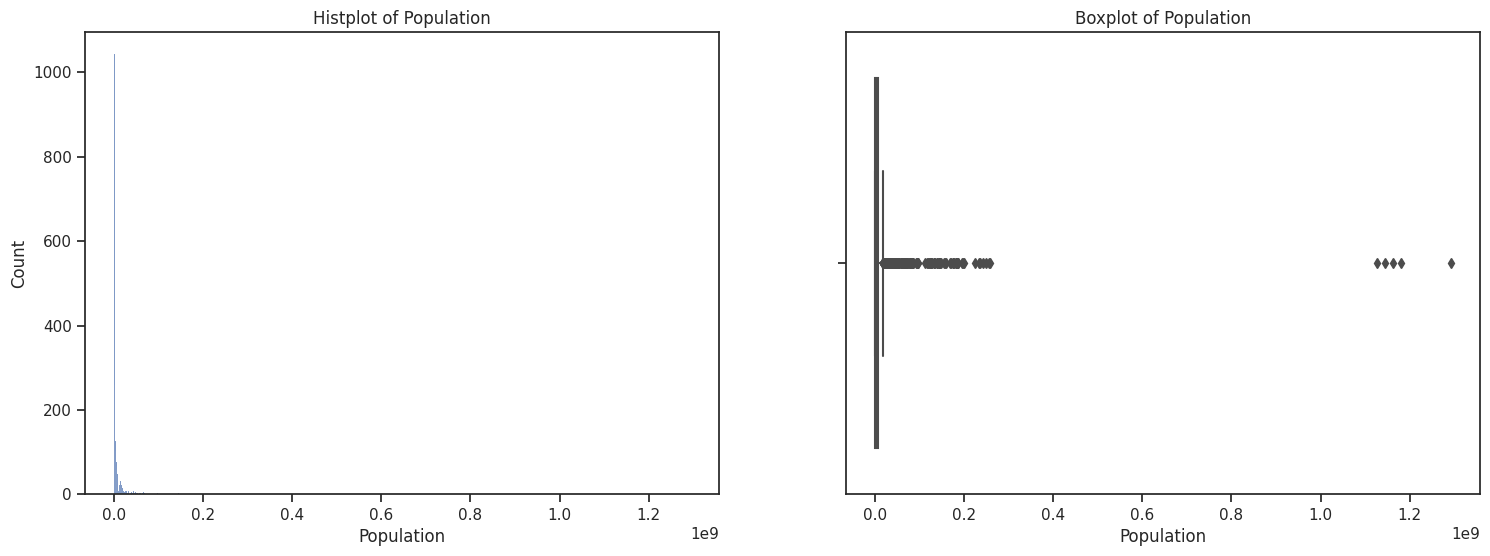

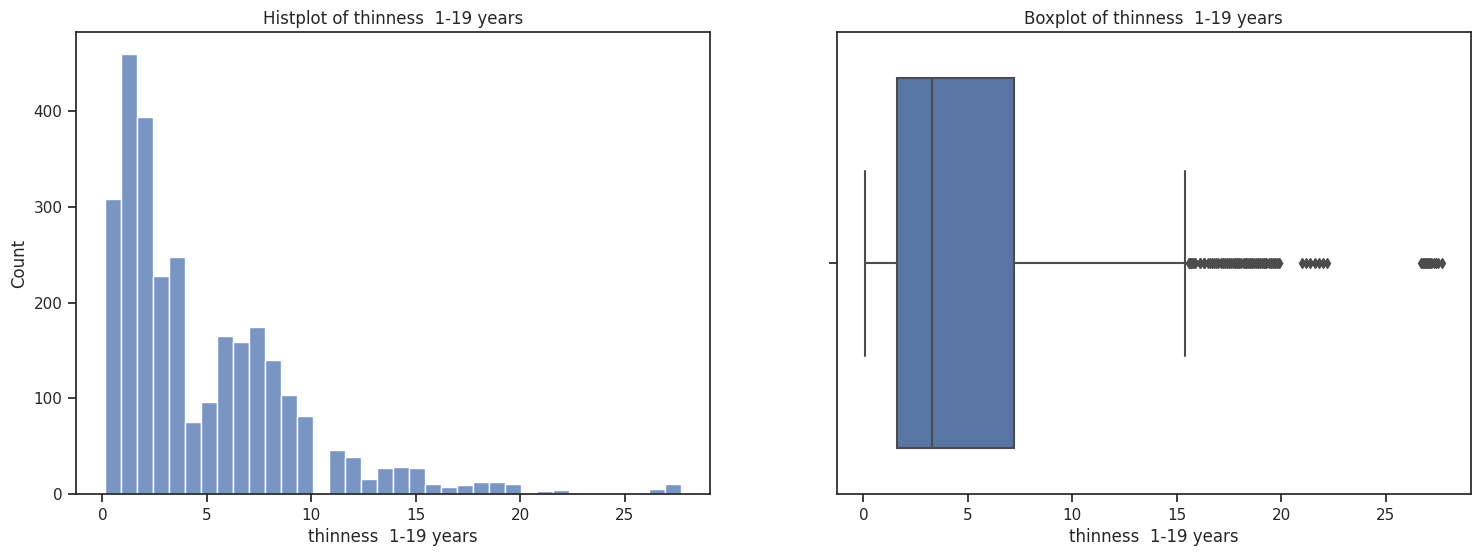

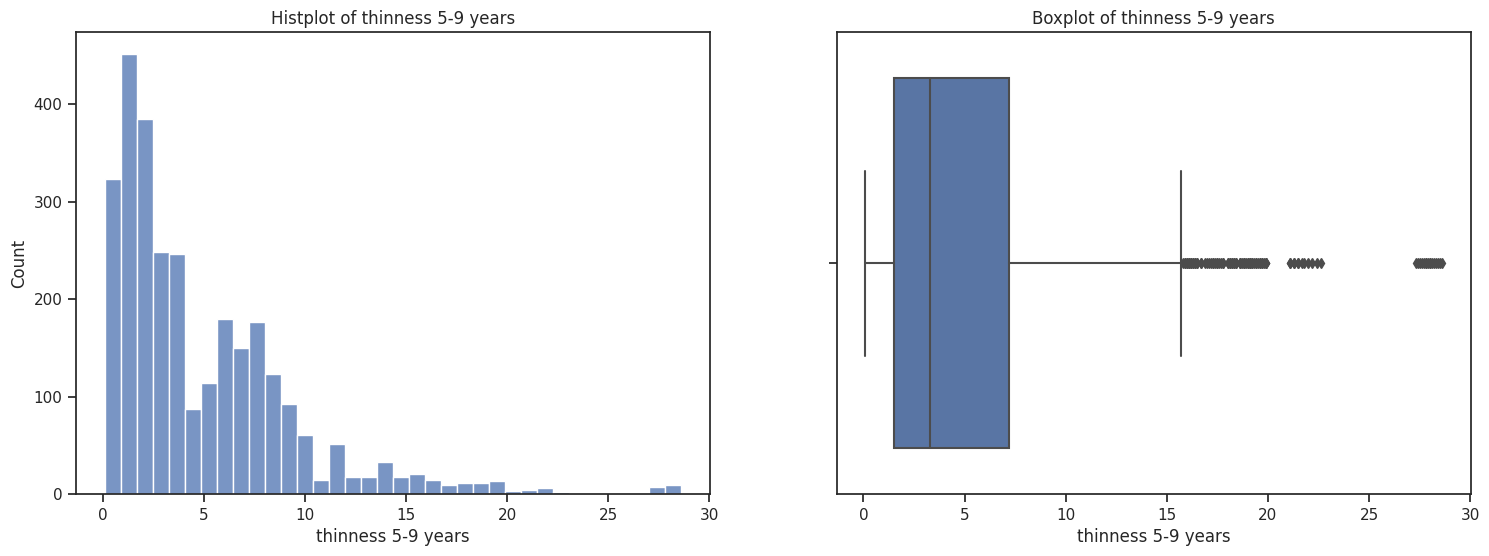

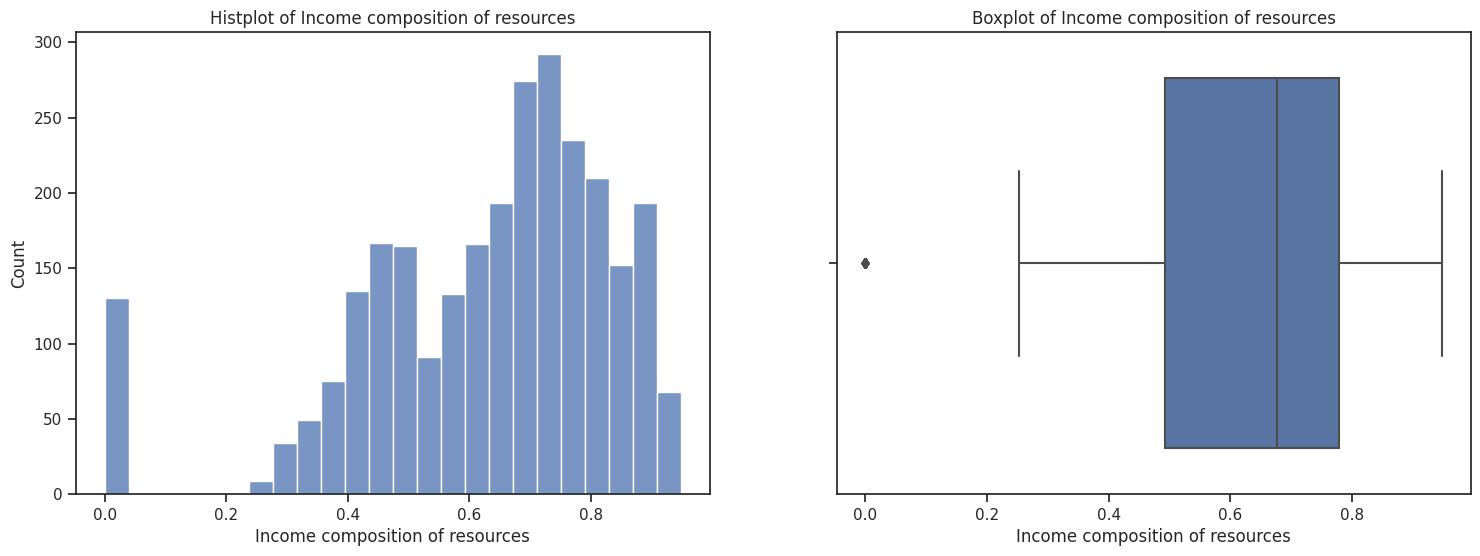

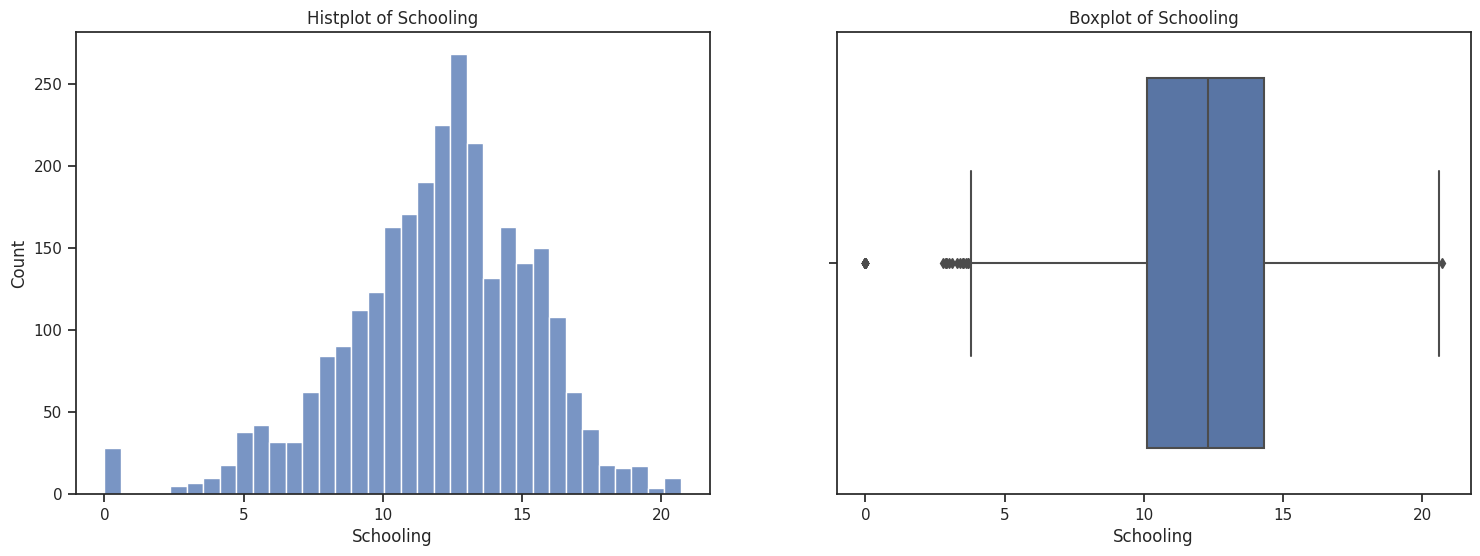

In [ ]:
generateNumericBoxPlotAndHist(df)

In [ ]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

Analisando os gráficos acima, obtemos as seguintes observações:

- Os anos de 2000 e 2015 são os que possuem mais dados.
- A espectativa de vida possui alguma semelhança com a distribuição normal, porém possui uma calda significativa à esquerda. Isso indica que provavelmente iremos precisar transformar o target.
- Mortalidade de adultos possui um gráfico de assintota, sendo a maioria dos paises iguais a zero. Proavelmente esses países com 0 são dados errôneos.
- Mortalidade infantil possui uma quantidade de dados muito grande próxima de 
zero, indicando que há muitos dados faltantes.
- O mesmo acontece com consumo de alcool, tendo uma grande quantidade em 0.
- O mesmo acontece em percentage expenditure
- Hepatite B possui dois picos, um próximo a zero e outro próximo a 100, indicando que provavelmente temos dois tipos de dados representados nesse gráfico, ou que temos dados errôneos.
- Measles possui um gráfico muito ruim, indicando uma qualidade ruim dos dados
- BMI possui dois picos, semelhante à Hepatite
- Under-five apresenta o problema de muitos dados iguais a zero.
- Polio possui dois picos, semelhante à Hepatite
- Total expenditure possui um gráfico semelhante a uma distribuição normal
- Diophiteria possui dois picos
- HIV/AIDS  possui muitos dados iguais a zero.
- GDP possui muitos dados iguais a zero.
- population possui muitos dados iguais a zero.
- Thiness possui um gráfico que se assemelha a uma normal com uma calda para direita.
- Thiness 5-9 possui um gráfico semelhante ao Thiness 1-19 indicando que as duas variáveis estão correlacionadas
- Income composition possui muitos dados iguais a zero.
- Schooling possui uma distribuição semelhante à normal, porém possui alguns dados iguais a zero.

Iremos substituir os valores iguais a zero por NAN nas seguintes colunas:

In [ ]:
cols_to_replace = ['Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 
       'Measles', 'BMI', 'under-five deaths', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling']

In [ ]:
def teste_normalidade(dados):
  stat, p = shapiro(dados)
  print('Estatística=%.3f, p-valor=%.3f' % (stat, p))
  alpha = 0.05
  if p > alpha:
      print('A amostra parece ser normal (não podemos rejeitar H0)')
  else:
      print('A amostra não parece ser normal (rejeitamos H0)')


In [ ]:
teste_normalidade(df['Life expectancy'])

Estatística=nan, p-valor=1.000
A amostra parece ser normal (não podemos rejeitar H0)


Através de shapiro não podemos rejeitar H0, ou seja, a amostra parece ter um target que segue a distribuição normal.

<ipython-input-21-51d8cd9f172b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, fmt='.1g',cmap= 'coolwarm')


<Axes: >

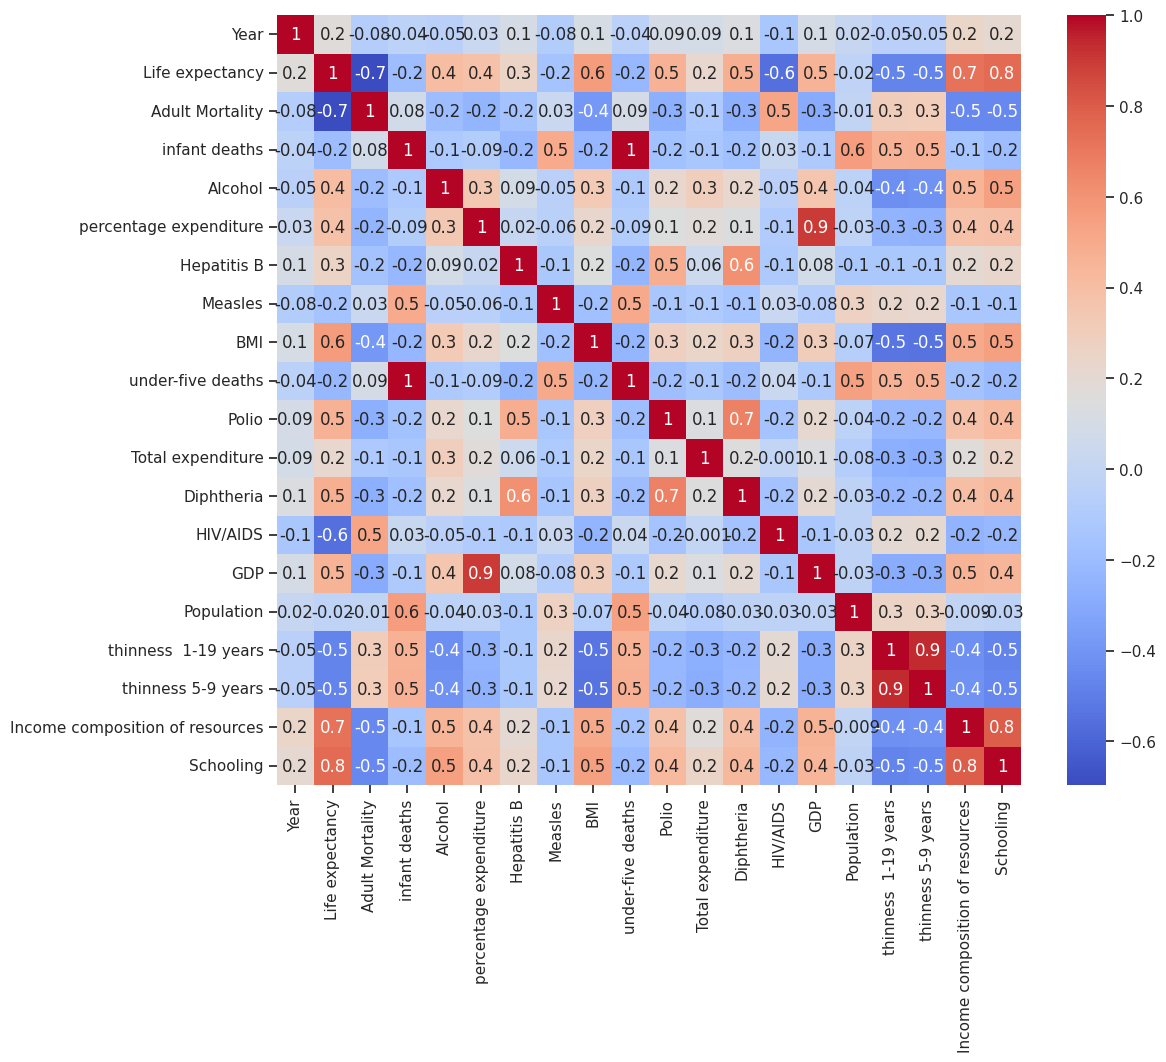

In [ ]:
ax = plt.subplots(figsize= (12, 10))
sns.heatmap(df.corr(), annot = True, fmt='.1g',cmap= 'coolwarm')

Podemos ver correlações altíssimas entre as colunas de Thiness, como esperado. GDP e Percentage Expenditure. Under-five deaths e infant deaths. 

Outras colunas possuem correlações altas, mas apenas essas parecem conflitantes. Antes de realizar qualquer procedimento, precisamos tratar os dados nulos dentre todas as colunas, para evitar que os dados não preenchidos influenciem a análise.

### Colocando valores errôneos como NA e populando todos os NA


Essa análise levará em conta apenas os dados errôneos que sejam iguais a zero.

In [ ]:
cols_to_replace

['Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Measles',
 'BMI',
 'under-five deaths',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness  1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [ ]:
for column in [cols_to_replace]:
    df[column] = df[column].replace(0.0, np.nan)
    df[column] = df[column].replace(0, np.nan)


In [ ]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                      848
Alcohol                            194
percentage expenditure             611
Hepatitis B                        553
Measles                            983
BMI                                 34
under-five deaths                  785
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    297
Schooling                          191
dtype: int64

## ANÁLISE DO BRASIL

Iremos realizar uma análise em um país específico para um melhor entendimento dos dados


In [ ]:
df_br = df[df['Country'] == 'Brazil'].sort_values(by='Year')

In [ ]:
df_br[['Adult Mortality','Year']]

,Adult Mortality,Year
367,183.0,2000
366,179.0,2001
365,176.0,2002
364,172.0,2003
363,17.0,2004
362,163.0,2005
361,161.0,2006
360,159.0,2007
359,158.0,2008
358,157.0,2009


In [ ]:
df_br.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,16.0,2007.5,4.760952285695233,2000.0,2003.75,2007.5,2011.25,2015.0
Life expectancy,16.0,73.38125,1.3065061551073271,71.0,72.525,73.5,74.55,75.0
Adult Mortality,16.0,150.6875,37.767214617972556,17.0,147.5,157.5,165.25,183.0
infant deaths,16.0,68.25,21.88606862823929,42.0,50.5,63.0,82.75,111.0
Alcohol,15.0,7.213333333333334,0.22298836185731652,6.85,7.05,7.21,7.325,7.58
percentage expenditure,15.0,416.7419681833333,398.8403212781269,15.85781237,112.07356511,186.6090485,703.85900805,1111.191325
Hepatitis B,16.0,96.1875,2.315707235381882,91.0,96.0,96.0,98.0,99.0
Measles,12.0,127.16666666666667,248.37282582050037,1.0,2.0,39.5,104.5,876.0
BMI,16.0,47.0625,11.819750420376906,5.3,45.9,49.0,53.0,56.1
under-five deaths,16.0,77.25,25.582546133382944,47.0,56.25,70.5,94.75,127.0


In [ ]:
df.isna().sum()/len(df)*100

Country                                          0.0
Year                                             0.0
Status                                           0.0
Life expectancy                   0.3403675970047651
Adult Mortality                   0.3403675970047651
infant deaths                     28.863172226004085
Alcohol                            6.603131381892443
percentage expenditure             20.79646017699115
Hepatitis B                        18.82232811436351
Measles                            33.45813478556842
BMI                               1.1572498298162015
under-five deaths                 26.718856364874068
Polio                             0.6466984343090538
Total expenditure                 7.6923076923076925
Diphtheria                        0.6466984343090538
HIV/AIDS                                         0.0
GDP                               15.248468345813478
Population                         22.19196732471069
thinness  1-19 years              1.1572498298

## Análise da India (exemplo)

In [ ]:
df[df['Country']=='India']

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1186,India,2015,Developing,68.3,181.0,910.0,NaN,NaN,87.0,90387.0,...,86.0,NaN,87.0,0.2,1613.18878,1395398.0,26.7,27.3,0.615,11.6
1187,India,2014,Developing,68.0,184.0,957.0,3.07,86.52153895,79.0,79563.0,...,84.0,4.69,85.0,0.2,1573.11889,1293859294.0,26.8,27.4,0.607,11.6
1188,India,2013,Developing,67.6,187.0,1000.0,3.11,67.67230438,7.0,13822.0,...,82.0,4.53,83.0,0.2,1452.195373,127856227.0,26.8,27.5,0.599,11.5
1189,India,2012,Developing,67.3,19.0,1100.0,3.1,64.96964491,73.0,18668.0,...,79.0,4.39,82.0,0.2,1446.98541,126365852.0,26.9,27.6,0.59,11.3
1190,India,2011,Developing,66.8,193.0,1100.0,3.0,64.6059005,44.0,33634.0,...,79.0,4.33,82.0,0.2,1461.671957,124723629.0,26.9,27.7,0.58,10.8
1191,India,2010,Developing,66.4,196.0,1200.0,2.77,57.73359864,38.0,31458.0,...,76.0,4.28,79.0,0.2,1345.77153,12398691.0,27.0,27.8,0.569,10.4
1192,India,2009,Developing,66.0,2.0,1300.0,2.5,0.844186331,37.0,56188.0,...,73.0,4.38,74.0,0.2,19.317765,121427132.0,27.0,27.8,0.563,10.5
1193,India,2008,Developing,65.5,23.0,1300.0,1.93,43.03043312,29.0,44258.0,...,69.0,4.34,7.0,0.3,991.484634,119714696.0,27.0,27.9,0.556,10.2
1194,India,2007,Developing,65.2,26.0,1400.0,1.59,5.234770324,6.0,41144.0,...,67.0,4.23,64.0,0.3,118.166373,1179681239.0,27.1,28.0,0.546,9.9
1195,India,2006,Developing,64.8,28.0,1500.0,1.37,34.85942671,6.0,64185.0,...,66.0,4.25,65.0,0.3,792.259698,1161977719.0,27.1,28.0,0.536,9.7


## Drop de colunas


Vimos através das análises acima que algumas colunas estão completamente erradas ao longo dos anos. Como não conseguimos validar qual o valor correto entre os anos, iremos descartar essas colunas.

Além disso, como os dados possuem um viés temporal, já que o valor do ano anterior afeta a linha seguinte, iremos analisar o ano de 2013, a fim de maximizar o número de paises e encontrar uma correlação relevante.

In [ ]:
df = df[df['Year']==2013]

In [ ]:
df.isna().sum()

Country                             0
Year                                0
Status                              0
Life expectancy                    10
Adult Mortality                    10
infant deaths                      66
Alcohol                             2
percentage expenditure             34
Hepatitis B                        11
Measles                            82
BMI                                 4
under-five deaths                  60
Polio                               0
Total expenditure                   2
Diphtheria                          0
HIV/AIDS                            0
GDP                                33
Population                         49
thinness  1-19 years                4
thinness 5-9 years                  4
Income composition of resources    17
Schooling                          15
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 2 to 2924
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          193 non-null    object 
 1   Year                             193 non-null    int64  
 2   Status                           193 non-null    object 
 3   Life expectancy                  183 non-null    float64
 4   Adult Mortality                  183 non-null    float64
 5   infant deaths                    127 non-null    float64
 6   Alcohol                          191 non-null    float64
 7   percentage expenditure           159 non-null    float64
 8   Hepatitis B                      182 non-null    float64
 9   Measles                          111 non-null    float64
 10  BMI                              189 non-null    float64
 11  under-five deaths                133 non-null    float64
 12  Polio                

In [ ]:
df[df['Country']=='India']

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1188,India,2013,Developing,67.6,187.0,1000.0,3.11,67.67230438,7.0,13822.0,...,82.0,4.53,83.0,0.2,1452.195373,127856227.0,26.8,27.5,0.599,11.5


In [ ]:
columns_to_drop = ['Population','GDP','Diphtheria','percentage expenditure','Hepatitis B','Measles','under-five deaths','Total expenditure','infant deaths']

In [ ]:
df = df.drop(axis=1,columns=columns_to_drop)

In [ ]:
df = df.dropna()

In [ ]:
df = df.reset_index()

In [ ]:
len(df['Country'].unique())

171

In [ ]:
teste_normalidade(df['Life expectancy'])

Estatística=0.971, p-valor=0.001
A amostra não parece ser normal (rejeitamos H0)


<Axes: xlabel='Life expectancy', ylabel='Count'>

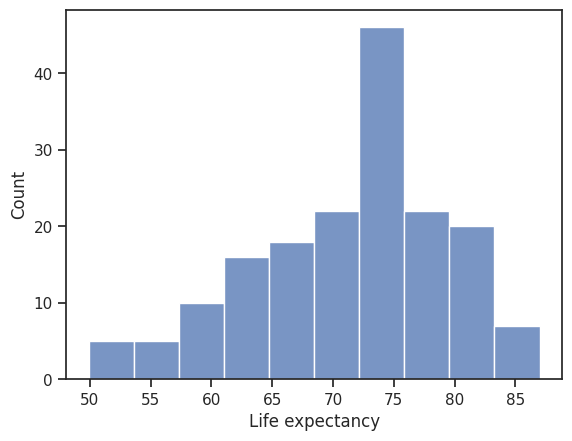

In [ ]:
sns.histplot(data=df,x='Life expectancy')

<ipython-input-41-51d8cd9f172b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, fmt='.1g',cmap= 'coolwarm')


<Axes: >

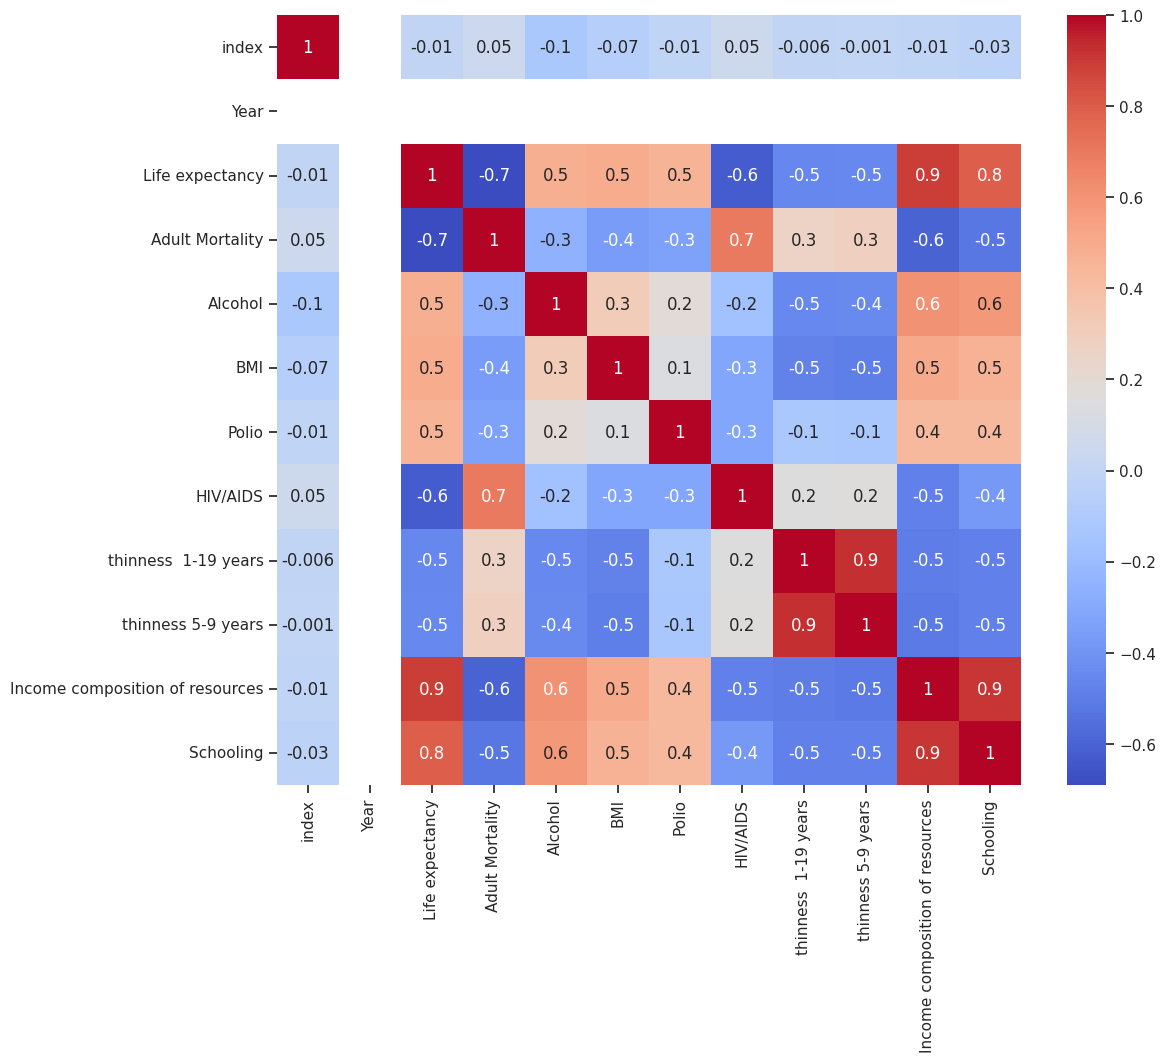

In [ ]:
ax = plt.subplots(figsize= (12, 10))
sns.heatmap(df.corr(), annot = True, fmt='.1g',cmap= 'coolwarm')

A partir dessa análise vemos que schooling e Income composition tem uma correlação altíssima e iremos deletar schooling, já que Income composition possui uma alta correlação com o target.

Thiness 5-9 será deletado já que possui correlação altíssima com Thinness 1-19, que inlcui 5-9.

In [ ]:
df = df.drop(axis=1,columns=['Schooling','thinness 5-9 years'])

In [ ]:
df['Life expectancy_log']= np.log(df['Life expectancy'])

<ipython-input-44-51d8cd9f172b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, fmt='.1g',cmap= 'coolwarm')


<Axes: >

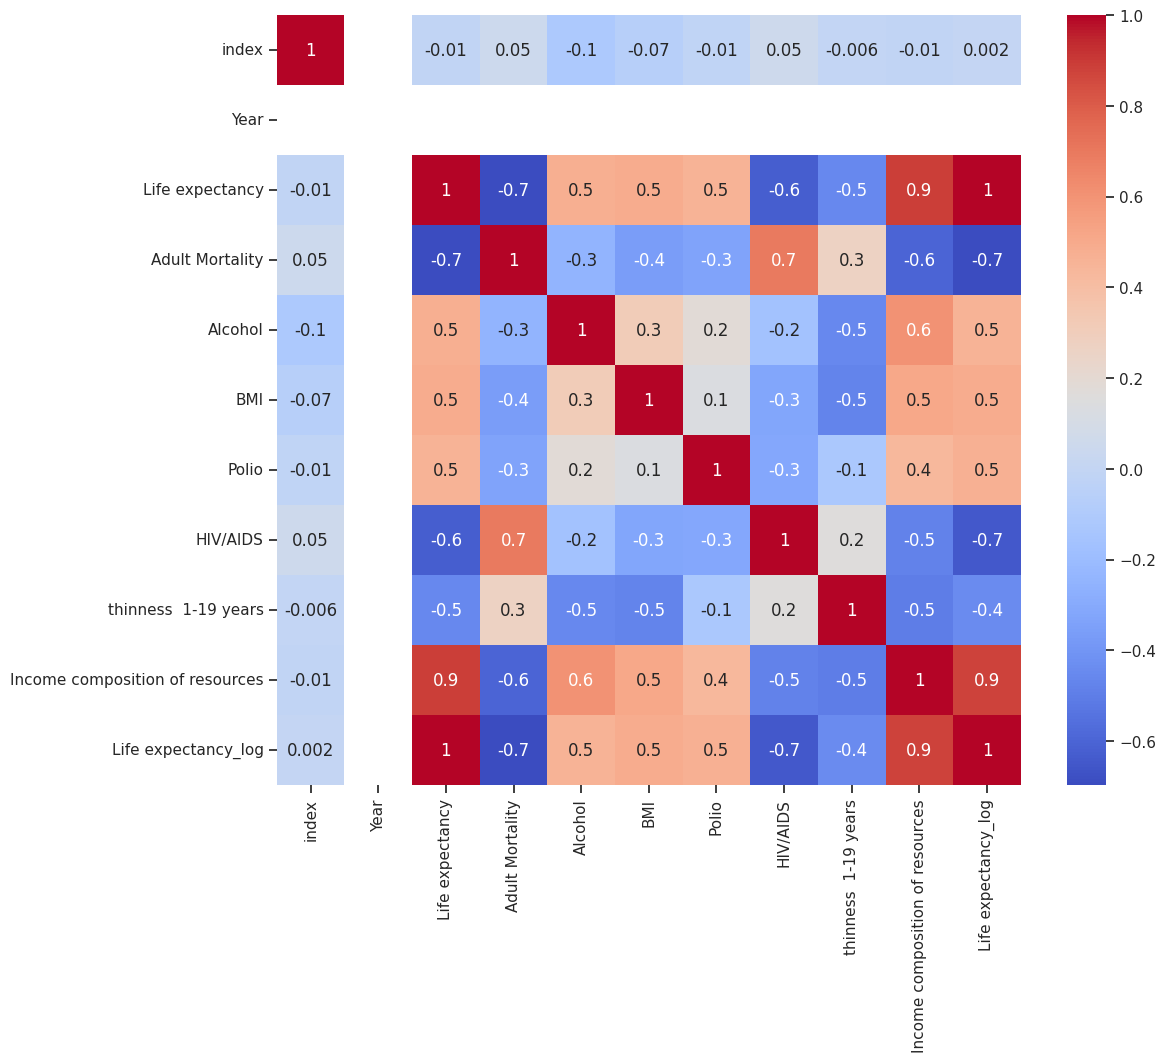

In [ ]:
ax = plt.subplots(figsize= (12, 10))
sns.heatmap(df.corr(), annot = True, fmt='.1g',cmap= 'coolwarm')

In [ ]:
teste_normalidade(df['Life expectancy_log'])

Estatística=0.951, p-valor=0.000
A amostra não parece ser normal (rejeitamos H0)


<Axes: xlabel='Life expectancy_log', ylabel='Count'>

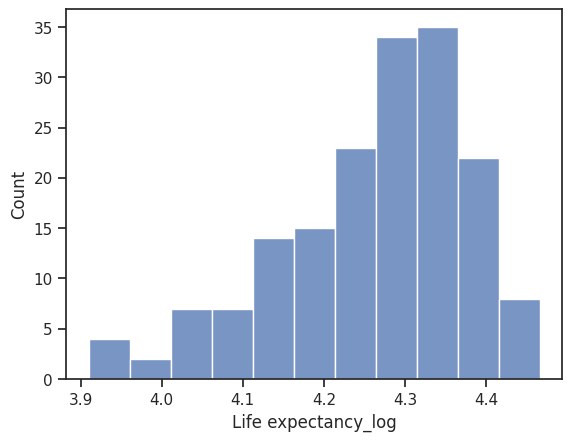

In [ ]:
sns.histplot(data=df,x='Life expectancy_log')

In [ ]:
df['Life expectancy_boxcox'], _ = boxcox(df['Life expectancy'])

<Axes: xlabel='Life expectancy_boxcox', ylabel='Count'>

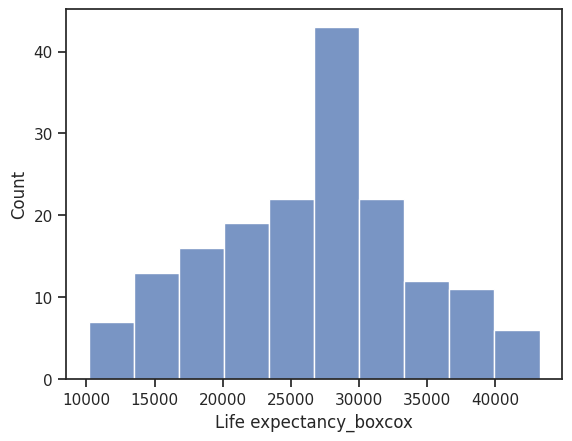

In [ ]:
sns.histplot(data=df,x='Life expectancy_boxcox')

In [ ]:
teste_normalidade(df['Life expectancy_boxcox'])

Estatística=0.985, p-valor=0.059
A amostra parece ser normal (não podemos rejeitar H0)


Podemos confirmar que o life expectancy pode ser considerado como normal.

## Regressão Linear


In [ ]:
mapping = {'Developing': 1, 'Developed': 2}
df['Status'] = df['Status'].map(mapping)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   index                            171 non-null    int64  
 1   Country                          171 non-null    object 
 2   Year                             171 non-null    int64  
 3   Status                           171 non-null    int64  
 4   Life expectancy                  171 non-null    float64
 5   Adult Mortality                  171 non-null    float64
 6   Alcohol                          171 non-null    float64
 7   BMI                              171 non-null    float64
 8   Polio                            171 non-null    float64
 9   HIV/AIDS                         171 non-null    float64
 10  thinness  1-19 years             171 non-null    float64
 11  Income composition of resources  171 non-null    float64
 12  Life expectancy_log   

In [ ]:
df_new = df.drop(['index', 'Country','Life expectancy_boxcox','Life expectancy_log','Life expectancy','Year'], axis=1)

# Get the list of column names and store it in 'col_names'
col_names = df_new.columns.tolist()

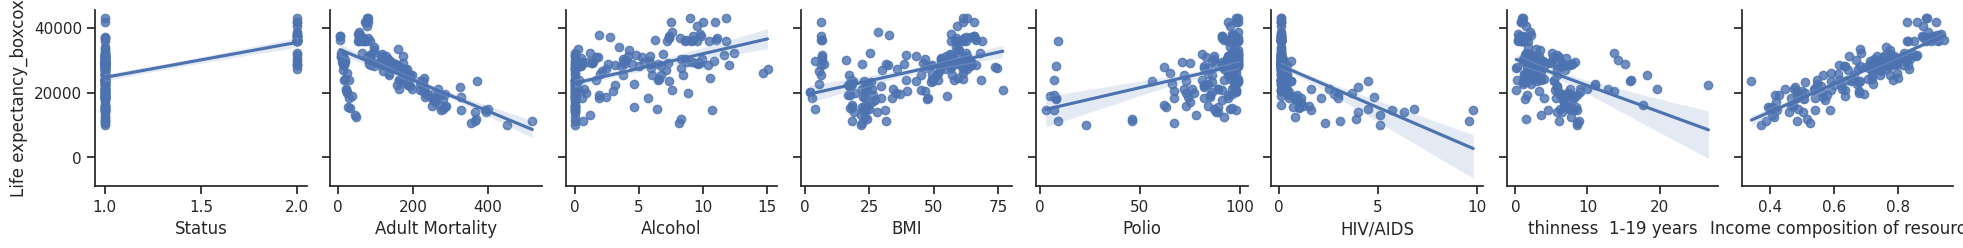

In [ ]:
sns.pairplot(data=df, y_vars=['Life expectancy_boxcox'], x_vars=col_names, kind='reg')

In [ ]:
X = df[['Income composition of resources']]
y = df["Life expectancy_boxcox"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train_com_constante = sm.add_constant(X_train)

modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()
print(modelo_statsmodels.summary())

                              OLS Regression Results                              
Dep. Variable:     Life expectancy_boxcox   R-squared:                       0.790
Model:                                OLS   Adj. R-squared:                  0.789
Method:                     Least Squares   F-statistic:                     504.7
Date:                    Mon, 17 Apr 2023   Prob (F-statistic):           2.80e-47
Time:                            15:20:42   Log-Likelihood:                -1296.1
No. Observations:                     136   AIC:                             2596.
Df Residuals:                         134   BIC:                             2602.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

Como F-statístico, t, Ominibus e Durbin-watson estão passando nos seus respectivos testes, sempre considerrando alpha = 0.05, podemos considerar essa análise válida. Entretanto, R² é apenas 0.79.

In [ ]:
X = df[['Income composition of resources','Status']]
y = df["Life expectancy_boxcox"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train_com_constante = sm.add_constant(X_train)

modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()
print(modelo_statsmodels.summary())

                              OLS Regression Results                              
Dep. Variable:     Life expectancy_boxcox   R-squared:                       0.795
Model:                                OLS   Adj. R-squared:                  0.792
Method:                     Least Squares   F-statistic:                     257.9
Date:                    Mon, 17 Apr 2023   Prob (F-statistic):           1.71e-46
Time:                            15:20:42   Log-Likelihood:                -1294.5
No. Observations:                     136   AIC:                             2595.
Df Residuals:                         133   BIC:                             2604.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

Vemos que Status não pode ser utilizado pois P > 0.05

In [ ]:
X = df[['Income composition of resources','Adult Mortality']]
y = df["Life expectancy_boxcox"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train_com_constante = sm.add_constant(X_train)

modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()
print(modelo_statsmodels.summary())

                              OLS Regression Results                              
Dep. Variable:     Life expectancy_boxcox   R-squared:                       0.828
Model:                                OLS   Adj. R-squared:                  0.825
Method:                     Least Squares   F-statistic:                     319.6
Date:                    Mon, 17 Apr 2023   Prob (F-statistic):           1.59e-51
Time:                            15:20:42   Log-Likelihood:                -1282.7
No. Observations:                     136   AIC:                             2571.
Df Residuals:                         133   BIC:                             2580.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

Podemos ver que utilizando Adult Mortality a correlação melhorou, já que AIC e BIC diminuiram, R² ajustado aumentou e todos os testes estão sendo atendidos.

In [ ]:
X = df[['Income composition of resources','Adult Mortality','Alcohol']]
y = df["Life expectancy_boxcox"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train_com_constante = sm.add_constant(X_train)

modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()
print(modelo_statsmodels.summary())

                              OLS Regression Results                              
Dep. Variable:     Life expectancy_boxcox   R-squared:                       0.828
Model:                                OLS   Adj. R-squared:                  0.824
Method:                     Least Squares   F-statistic:                     211.5
Date:                    Mon, 17 Apr 2023   Prob (F-statistic):           3.19e-50
Time:                            15:20:42   Log-Likelihood:                -1282.7
No. Observations:                     136   AIC:                             2573.
Df Residuals:                         132   BIC:                             2585.
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

Alcohol é rejeitado pelo P da variável.

In [ ]:
X = df[['Income composition of resources','Adult Mortality','BMI']]
y = df["Life expectancy_boxcox"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train_com_constante = sm.add_constant(X_train)

modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()
print(modelo_statsmodels.summary())

                              OLS Regression Results                              
Dep. Variable:     Life expectancy_boxcox   R-squared:                       0.828
Model:                                OLS   Adj. R-squared:                  0.824
Method:                     Least Squares   F-statistic:                     212.2
Date:                    Mon, 17 Apr 2023   Prob (F-statistic):           2.68e-50
Time:                            15:20:42   Log-Likelihood:                -1282.5
No. Observations:                     136   AIC:                             2573.
Df Residuals:                         132   BIC:                             2585.
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

BMI é rejeitado pelo P da variável.

In [ ]:

X = df[['Income composition of resources','Adult Mortality','Polio','HIV/AIDS','thinness  1-19 years']]
y = df["Life expectancy_boxcox"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train_com_constante = sm.add_constant(X_train)

modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()
print(modelo_statsmodels.summary())

                              OLS Regression Results                              
Dep. Variable:     Life expectancy_boxcox   R-squared:                       0.836
Model:                                OLS   Adj. R-squared:                  0.829
Method:                     Least Squares   F-statistic:                     132.1
Date:                    Mon, 17 Apr 2023   Prob (F-statistic):           3.49e-49
Time:                            15:20:42   Log-Likelihood:                -1279.6
No. Observations:                     136   AIC:                             2571.
Df Residuals:                         130   BIC:                             2589.
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

Vemos que Thiness e Polio possuem P maior que 0.05. Logo serão rejeitados.

In [ ]:

X = df[['Income composition of resources','Adult Mortality','HIV/AIDS']]
y = df["Life expectancy_boxcox"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train_com_constante = sm.add_constant(X_train)

modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()
print(modelo_statsmodels.summary())

                              OLS Regression Results                              
Dep. Variable:     Life expectancy_boxcox   R-squared:                       0.834
Model:                                OLS   Adj. R-squared:                  0.830
Method:                     Least Squares   F-statistic:                     220.4
Date:                    Mon, 17 Apr 2023   Prob (F-statistic):           3.31e-51
Time:                            15:20:42   Log-Likelihood:                -1280.3
No. Observations:                     136   AIC:                             2569.
Df Residuals:                         132   BIC:                             2580.
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

Vemos que R² ajustado aumentou, AIC e BIC diminuiram, os testes passaram em conjunto, apesar de omnibus ficar muito próximo do target. Essa será nossa regressão final.

Text(0.5, 0, 'Predito')

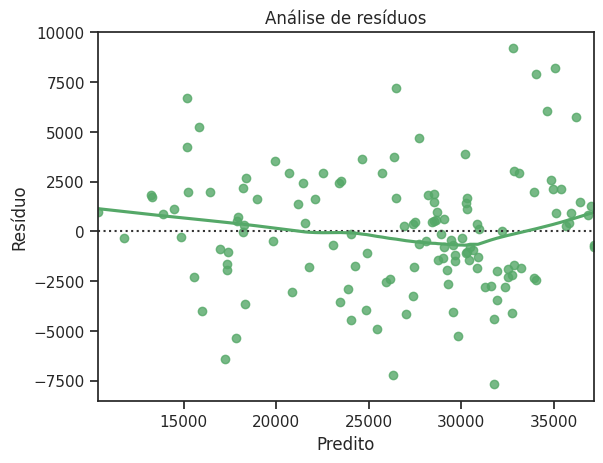

In [ ]:
ax_residual = sns.residplot(x=modelo_statsmodels.predict(), y=modelo_statsmodels.resid, lowess=True, color="g")
ax_residual.set_title("Análise de resíduos")
plt.ylabel('Resíduo')
plt.xlabel('Predito')

Vemos os resíduios aleatoriamente dispersos, homocedásticos, linear em torno de zero e sem padrões visíveis.

# Respostas finais

1. Quais são as variáveis que realmente afetam a expectativa de vida? ['Income composition of resources','Adult Mortality','HIV/AIDS']



2. Um país com expectativa de vida menor (<65) deve aumentar seus investimentos em saúde a fim de melhorar sua expectativa de vida média? Sim, focando na diminuição de contaminação da AIDS e HIV e na diminuição da mortalidade adulta.



3. Como as taxas de mortalidade infantil e de adultos afetam a expectativa de vida? Podemos afirmar que a taxa de moratalidade de adultos possui uma correlação negativa com a expectativa de vida (coef = -12).



4. A expectativa de vida tem correlação positiva ou negativa com hábitos alimentares, estilo de vida, exercícios, fumo, consumo de álcool etc.? Não podemos afirmar sobre a maior parte dessas variáveis, já que elas não se faziam presente no data set, porém para o álcool é visto uma correlação positiva com expectativa de vida. Porém essa análise de regressão não é válida já que o P valor da variável álcool foi maior que 0.05. 



5. Qual é o impacto da escolaridade na expectativa de vida dos humanos? Escolaridade não foi analisado na correlação devido a sua alta correlação com o IDH (I.C.R.). Entretanto, como o IDH foi analisádo e possui uma correlação muito forte com a expectativa de vida, isso indica que é possível que haja uma correlação positiva com a expectativa de vida, porém pode ser uma correlação devido a terceira variável (como a própria IDH).



6. A expectativa de vida tem uma relação positiva ou negativa com o consumo de álcool? Não podemos afirmar sobre a correlação já que o P valor da variável foi maior do que 0.05


7. Países densamente povoados tendem a ter menor expectativa de vida? Não foi analisado a variável popúlação devido ao grande número de dados incorretos nessa coluna.



8. Qual é o impacto da cobertura de imunização na expectativa de vida? Não podemos afirmar nada sobre essa variável.
